# Ejercicio análisis time series
Para este ejercicio vas a trabajar con el histórico de valores en bolsa de una empresa que se dedica a vender muebles. Se pide

1. Importa los datos 'df_furniture.csv':

2. Trata la fecha como texto. Crea una columna para el año, mes y dia, y a partir de esas columnas crea la de fecha, en formato datetime de pandas

3. ¿De qué fecha a qué fecha va el histórico?

4. ¿Cómo es la serie temporal? ¿Tiene tendencia? ¿Aprecias alguna estacionalidad?

5. ¿Podrías demostrar de dos maneras estadísticas que la serie no es stationary?

6. Parece que hay una tendencia, pero no se aprecia bien con tanto pico en la serie. ¿Conoces algún método para representar mejor la tendencia?

7. Estaría bien visualizar todos los componentes de la serie temporal por separado

8. Demuestra mediante una gráfica de autocorrelación que la serie es estacional

9. ¿Qué dependencia tiene cada instante de sus ultimos 5 lags? Demuéstralo mediante una matriz de correlación. ¿Esto es bueno para los modelos?

10. Ya hemos visto que hay seasonality. ¿Cada cuántos instantes se cumple ese patrón?

11. Para un futuro modelado de los datos necesitaremos eliminar la tendencia. ¿Cómo hacemos esto?

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## 1. Cargamos los datos

In [2]:
df_furniture = pd.read_csv('./data/df_furniture.csv', sep=',')
df_furniture.head(20)

,Month,furniture_price_adjusted
0,1992-01-01,2073.432724
1,1992-02-01,2114.485812
2,1992-03-01,2260.570891
3,1992-04-01,2255.103236
4,1992-05-01,2331.414618
5,1992-06-01,2384.638567
6,1992-07-01,2417.165376
7,1992-08-01,2445.498729
8,1992-09-01,2387.351705
9,1992-10-01,2489.350838


In [3]:
df_furniture.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     326 non-null    object 
 1   furniture_price_adjusted  331 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.3+ KB


In [4]:
df = df_furniture.copy()

In [5]:
df['Month'] = pd.to_datetime(df['Month'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Month                     326 non-null    datetime64[ns]
 1   furniture_price_adjusted  331 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.3 KB


In [6]:
df.head()

,Month,furniture_price_adjusted
0,1992-01-01,2073.432724
1,1992-02-01,2114.485812
2,1992-03-01,2260.570891
3,1992-04-01,2255.103236
4,1992-05-01,2331.414618


In [7]:
df['date'] = df.Month
df['price'] = df.furniture_price_adjusted
df.drop(columns=['Month','furniture_price_adjusted'], inplace=True)

In [8]:
df.set_index('date', inplace=True, drop=True)

In [9]:
df.tail()

,price
date,
2019-03-01,9718.107698
2019-04-01,9248.814254
2019-05-01,10001.305304
2019-06-01,9431.337229
2019-07-01,9887.800688


,value
Month,
2017-12-01,10833.501852
2018-01-01,8417.343128
2018-02-01,8266.943270
2018-03-01,9754.740971
2018-04-01,8973.885759
2018-05-01,9733.086145
2018-06-01,9554.807941
2018-07-01,9542.663403
2018-08-01,10010.598100


## 2. Tratar la fecha como texto y parsear

In [12]:
df['new_date'] = (df.index).astype(str)

In [13]:
df[['year', 'month','day']] = df['new_date'].str.split(pat='-', expand= True)

In [14]:
df.head()

,price,new_date,year,month,day
date,,,,,
1992-01-01,2073.432724,1992-01-01,1992,01,01
1992-02-01,2114.485812,1992-02-01,1992,02,01
1992-03-01,2260.570891,1992-03-01,1992,03,01
1992-04-01,2255.103236,1992-04-01,1992,04,01
1992-05-01,2331.414618,1992-05-01,1992,05,01


In [15]:
df.dropna(inplace=True)

In [16]:
df['year'] = df.year.astype(int)
df['month'] = df.month.astype(int)
df['day'] = df.day.astype(int)

In [17]:
df.head()

,price,new_date,year,month,day
date,,,,,
1992-01-01,2073.432724,1992-01-01,1992,1,1
1992-02-01,2114.485812,1992-02-01,1992,2,1
1992-03-01,2260.570891,1992-03-01,1992,3,1
1992-04-01,2255.103236,1992-04-01,1992,4,1
1992-05-01,2331.414618,1992-05-01,1992,5,1


,Month,furniture_price_adjusted,year,month,day,new_date
0,1992-01-01,2073.432724,1992,1,1,1992-01-01
1,1992-02-01,2114.485812,1992,2,1,1992-02-01
2,1992-03-01,2260.570891,1992,3,1,1992-03-01
3,1992-04-01,2255.103236,1992,4,1,1992-04-01
4,1992-05-01,2331.414618,1992,5,1,1992-05-01


## 3. ¿De qué fecha a qué fecha va el histórico?

La serie va desde enero de 1992 a julio de 2019

1992-01-01 00:00:00
2019-07-01T00:00:00.000000000


In [18]:
df.index.max() , df.index.min()

(Timestamp('2019-07-01 00:00:00'), Timestamp('1992-01-01 00:00:00'))

In [19]:
pd.infer_freq(df.index, warn=True)

## 4. ¿Cómo es la serie temporal? ¿Tiene tendencia? ¿Aprecias alguna estacionalidad?

<AxesSubplot:xlabel='date'>

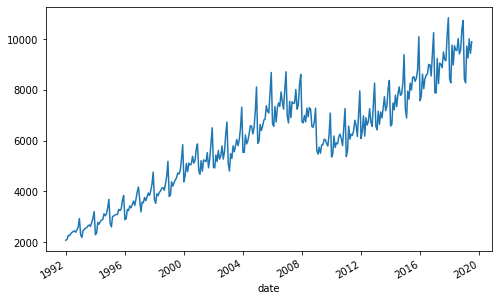

In [20]:
plt.subplots(figsize=(8,5))
df['price'].plot()

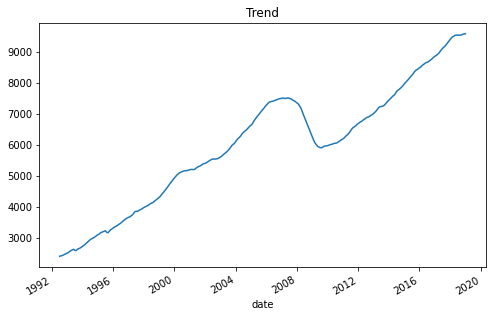

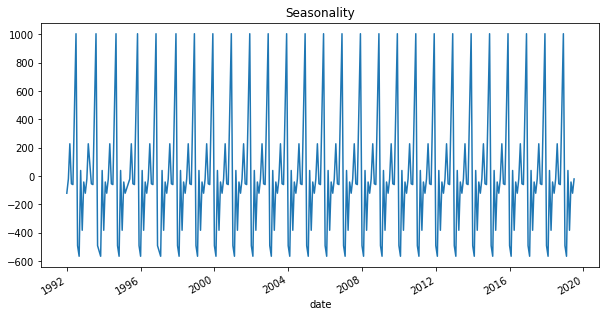

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Additive Decomposition
result_add = seasonal_decompose(df['price'], model='additive', period= 12)

# Plot
plt.subplots(figsize=(8,5))
result_add.trend.plot()
plt.title('Trend')
plt.subplots(figsize=(10,5))
result_add.seasonal.plot()
plt.title('Seasonality');

Si se observa tanto una tendencia alcista como una *seasonality*, dado que tiene un marcado patronde comportamiento.

Se ve que tiene una clara tendencia al alza, a pesar de una pequeña bajada en als acciones en el 2007.

También apreciamos estacionalidad, al cumplirse cierto patrón a lo largo del tiempo

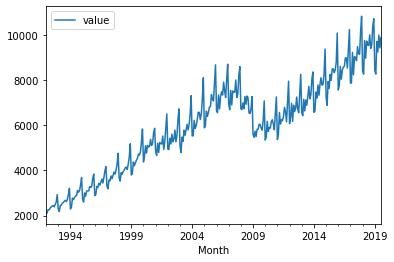

## 5. ¿Podrías demostrar de dos maneras estadísticas que la serie no es stationary?

In [22]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['price'], autolag = 'AIC')
result

(-1.0947325476367404,
 0.7171679263890367,
 15,
 310,
 {'1%': -3.451621854687657,
  '5%': -2.870908950689806,
  '10%': -2.571761810613944},
 4265.177438566132)

In [24]:
print("p_values test Dickey Fuller:", round(result[1], 4))
print("El resultado del Test Dickey Fuller es superior a 0.05 (nivel de significación), se valida la H0, la series NO es ESTACIONARIA")

p_values test Dickey Fuller: 0.7172
El resultado del Test Dickey Fuller es superior a 0.05 (nivel de significación), se valida la H0, la series NO es ESTACIONARIA


0.7035529748090005

In [27]:
df.iloc[:-150,0].describe().T

count     176.000000
mean     4690.300381
std      1616.127985
min      2073.432724
25%      3299.382517
50%      4701.031968
75%      5843.331635
max      8705.820949
Name: price, dtype: float64

In [28]:
df['price'][150:-10].describe().T

count      166.000000
mean      7406.758626
std       1172.650634
min       5349.481724
25%       6565.015078
50%       7269.418616
75%       8232.145491
max      10833.501852
Name: price, dtype: float64

Se comprueba que los datos estadísticos (media y varianza) en diferentes intervalos de tiempo no son iguales (T1 ==> media 4690.30 - std 1616.12 y T2 ==> media 7406.75 - std 1172.65), por lo tanto la serie *NO es ESTACIONARIA*.

,value
count,165.000000
mean,4366.695881
std,1412.738867
min,2073.432724
25%,3115.400080
50%,4275.168742
75%,5428.334524
max,8110.153770


,value
count,166.000000
mean,7575.142501
std,1270.370560
min,5349.481724
25%,6613.056182
50%,7345.578004
75%,8439.580036
max,10833.501852


## 6. ¿Conoces algún método para representar mejor la tendencia?

<AxesSubplot:xlabel='date'>

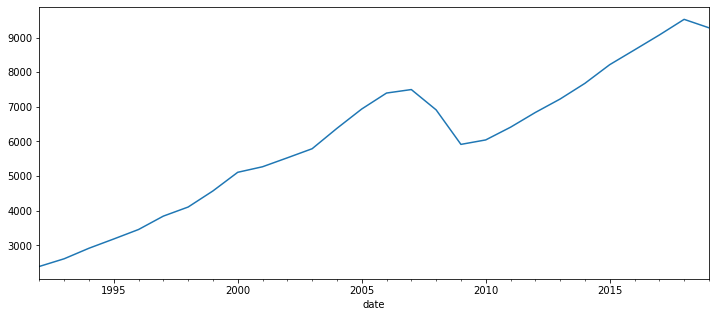

In [29]:
df_ma = df.groupby(pd.Grouper(freq='Y')).mean()

df_ma['price'].plot(figsize=(12,5))

<AxesSubplot:xlabel='date'>

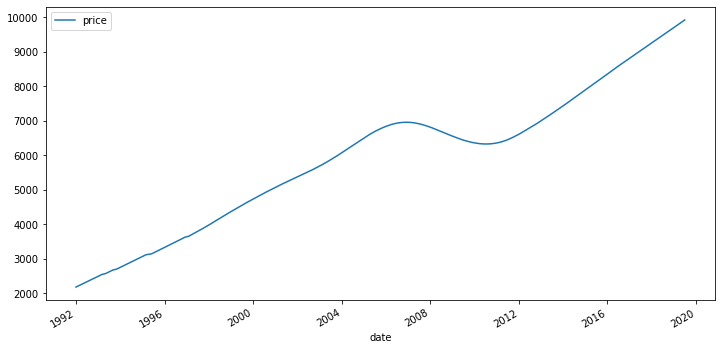

In [30]:
from statsmodels.nonparametric.smoothers_lowess import lowess

df_lowess_25 = pd.DataFrame(lowess(df.price, np.arange(len(df['price'])),
                            frac= 0.25)[:,1],
                            index= df.index,
                            columns=['price'])

df_lowess_25.plot(figsize=(12,6))


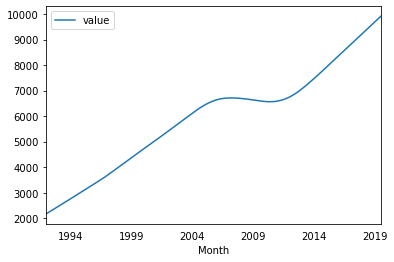

<AxesSubplot:xlabel='date', ylabel='price'>

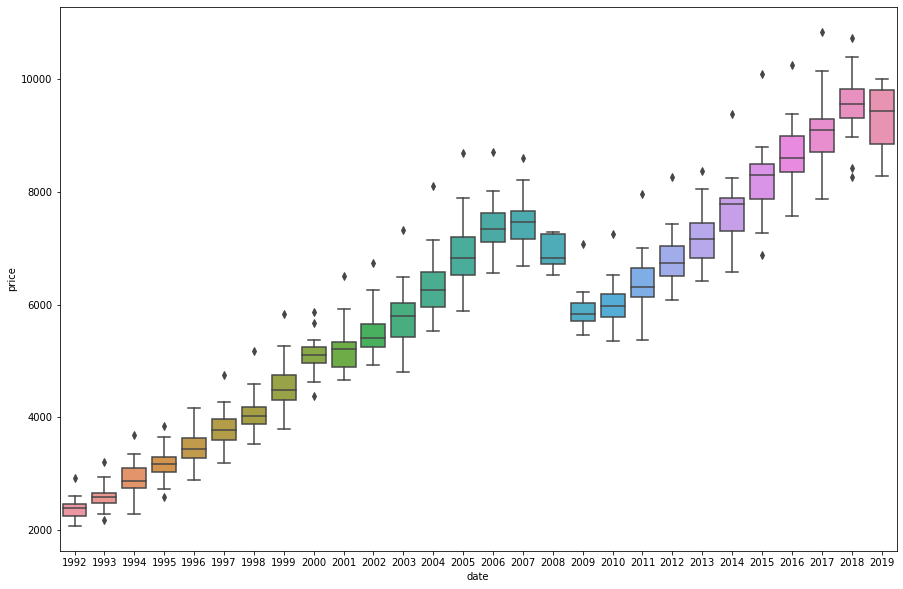

In [31]:
plt.subplots(figsize=(15,10))
sns.boxplot(x=df.index.year, y='price', data=df)

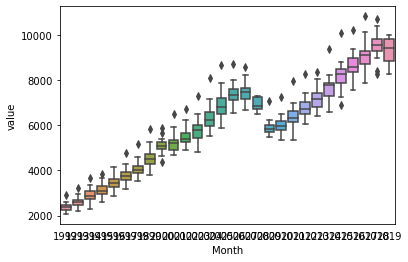

## 7. Estaría bien visualizar todos los componentes de la serie temporal por separado

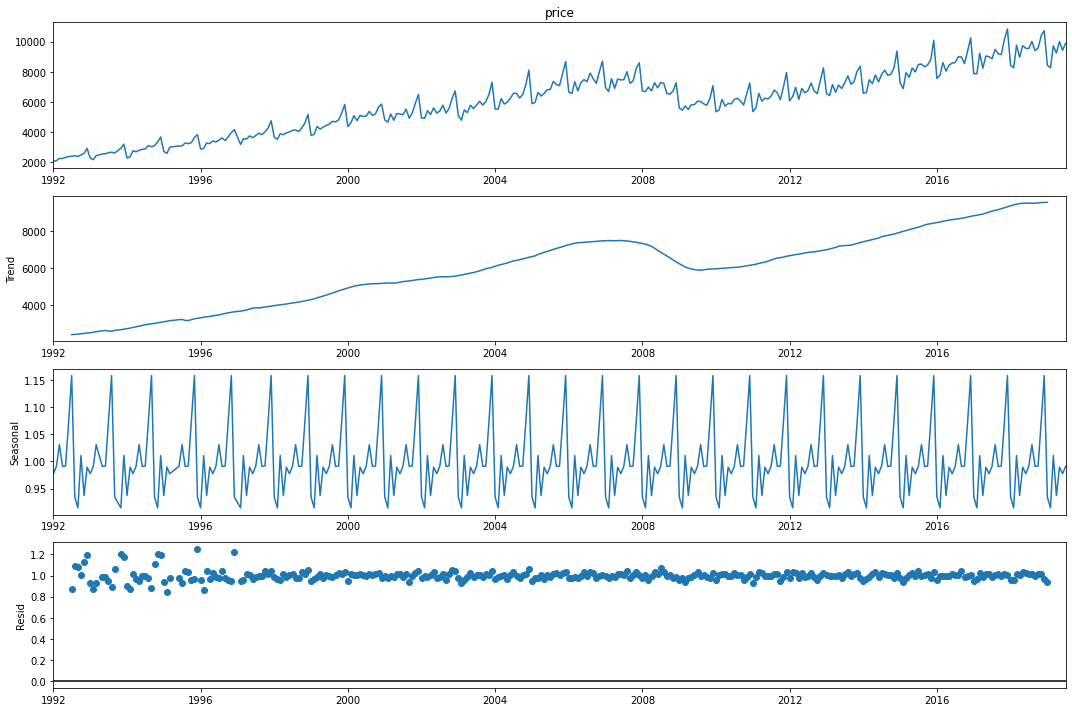

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose

descomposed_df = seasonal_decompose(df.price, model= 'multiplicative', period=12)

plt.rcParams.update({'figure.figsize': (15,10)})
descomposed_df.plot();

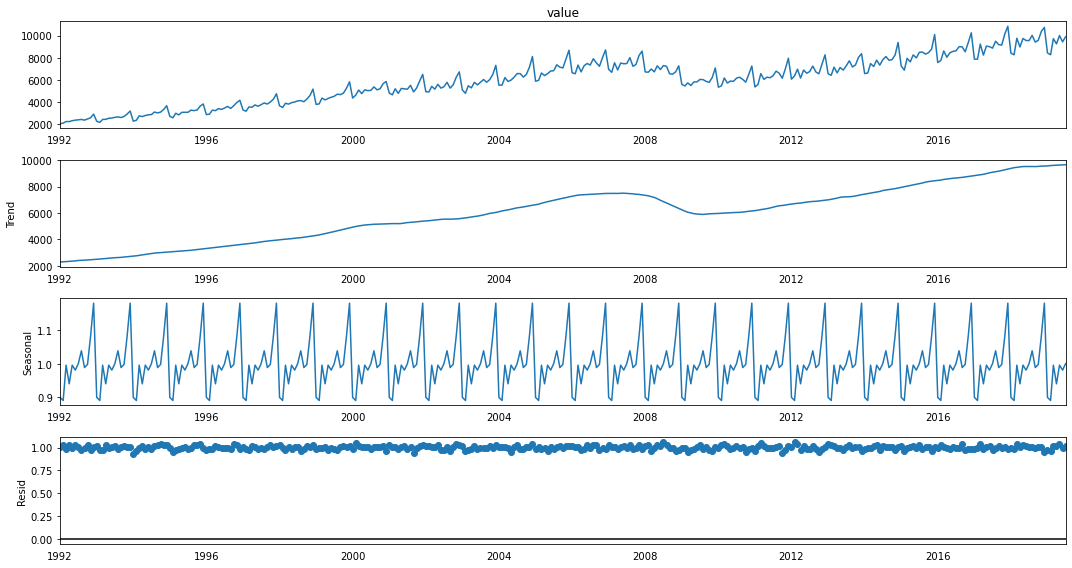

## 8. Demuestra mediante una gráfica de autocorrelación que la serie es estacional

In [33]:
from pandas.plotting import autocorrelation_plot
plt.rcParams.update({'figure.figsize': (10,)})
autocorrelation_plot(df.price)

ValueError: Key figure.figsize: Expected 2 values, but there are 1 values in (10,)

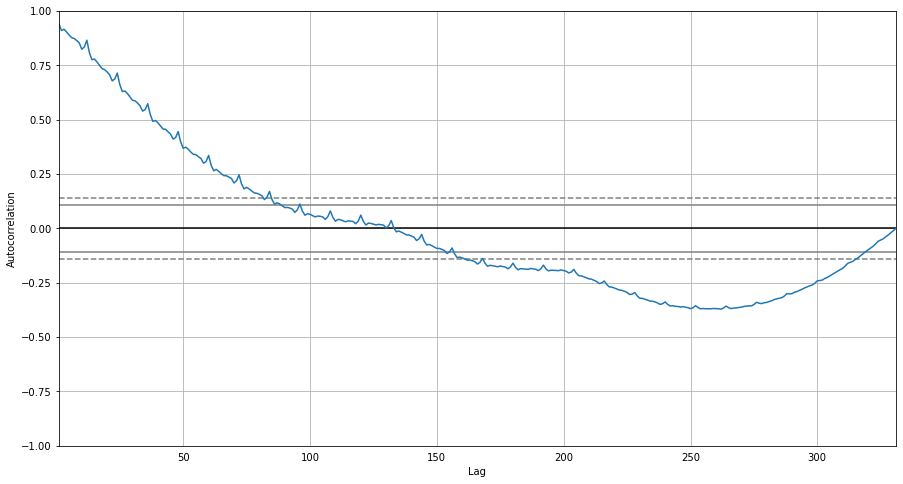

## 9. ¿Qué dependencia tiene cada instante de sus ultimos 5 lags? Demuestralo mediante una matriz de correlación.

In [34]:
df_5lags = df.iloc[:,0:1].copy()
df_5lags.head()

,price
date,
1992-01-01,2073.432724
1992-02-01,2114.485812
1992-03-01,2260.570891
1992-04-01,2255.103236
1992-05-01,2331.414618


In [200]:
#print(df_5lags.iloc[:,0][:5])
#type(df_5lags.iloc[:,0])

In [35]:
for i in range(1,6):
    col = 'lag'+ str(i)
    df_5lags[col] = df_5lags.iloc[:,0].shift(i)

In [36]:
 df_5lags.head()

,price,lag1,lag2,lag3,lag4,lag5
date,,,,,,
1992-01-01,2073.432724,NaN,NaN,NaN,NaN,NaN
1992-02-01,2114.485812,2073.432724,NaN,NaN,NaN,NaN
1992-03-01,2260.570891,2114.485812,2073.432724,NaN,NaN,NaN
1992-04-01,2255.103236,2260.570891,2114.485812,2073.432724,NaN,NaN
1992-05-01,2331.414618,2255.103236,2260.570891,2114.485812,2073.432724,NaN


In [203]:
df_5lags.corr()

,price,lag1,lag2,lag3,lag4,lag5
price,1.000000,0.949206,0.925873,0.943190,0.938781,0.933566
lag1,0.949206,1.000000,0.948781,0.925036,0.942776,0.938122
lag2,0.925873,0.948781,1.000000,0.948387,0.924422,0.942272
lag3,0.943190,0.925036,0.948387,1.000000,0.948074,0.923593
lag4,0.938781,0.942776,0.924422,0.948074,1.000000,0.947683
lag5,0.933566,0.938122,0.942272,0.923593,0.947683,1.000000


,value,lag1,lag2,lag3,lag4,lag5
value,1.000000,0.951005,0.928338,0.945035,0.940613,0.935901
lag1,0.951005,1.000000,0.950599,0.927538,0.944637,0.939980
lag2,0.928338,0.950599,1.000000,0.950224,0.926949,0.944155
lag3,0.945035,0.927538,0.950224,1.000000,0.949927,0.926156
lag4,0.940613,0.944637,0.926949,0.949927,1.000000,0.949554
lag5,0.935901,0.939980,0.944155,0.926156,0.949554,1.000000


## 10. Ya hemos visto que hay seasonality. ¿Cada cuántos instantes se cumple ese patrón?

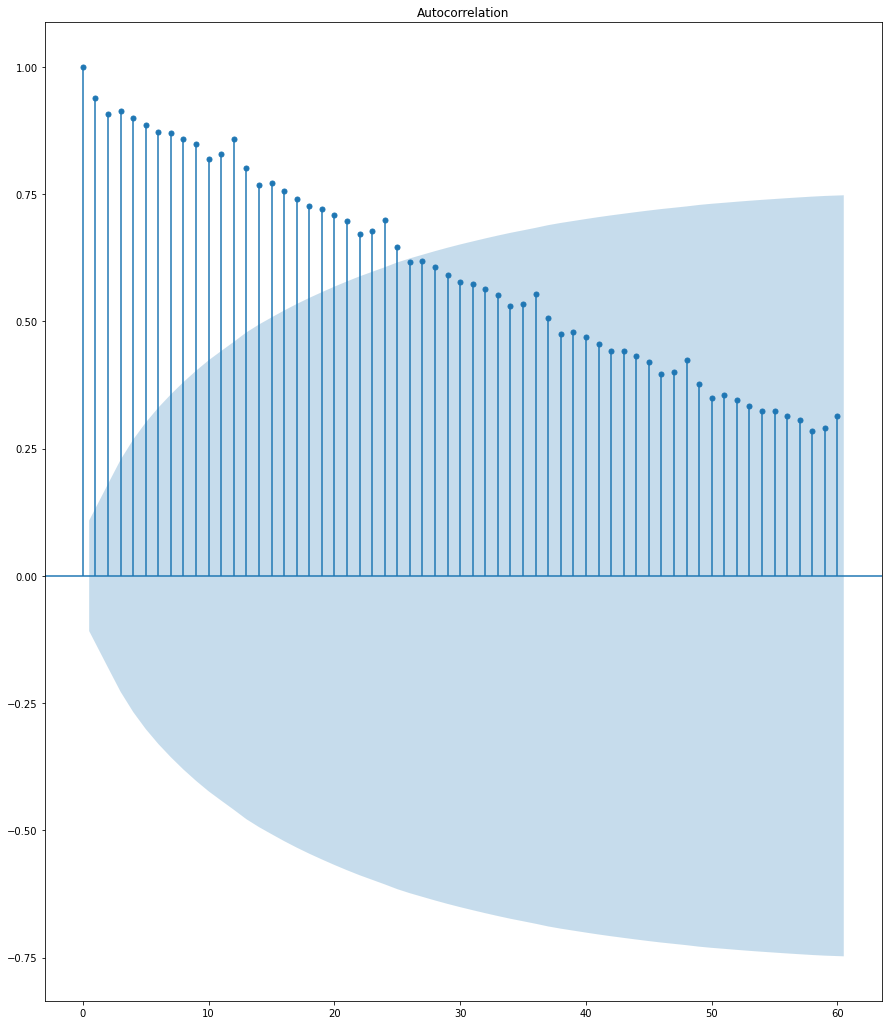

In [37]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize': (15,18)})
plot_acf(df_5lags.iloc[:,0], lags=60);

Se observa en la gráfica que el patron de *seasonality* se produce cada *12* instantes. En la serie temporal la frecuencia es *mesual* multiplicada por el patron de 12 instantes, *un año*.

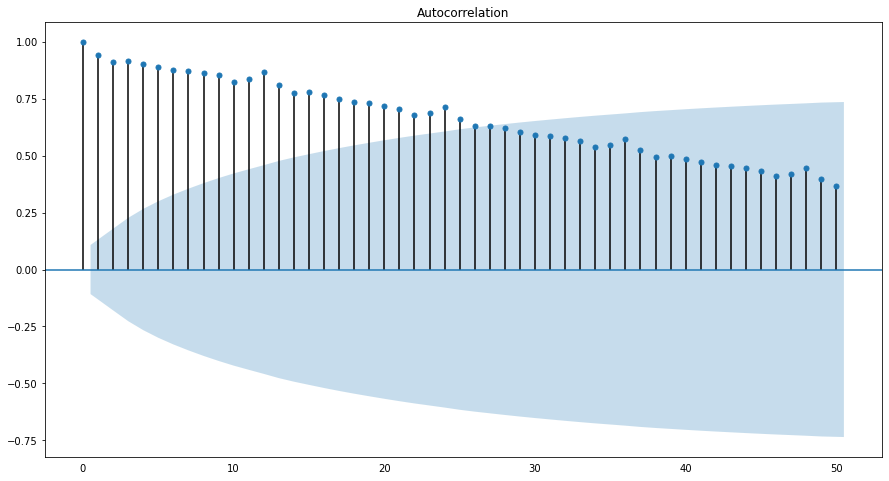

## 11. Para un futuro modelado de los datos necesitaremos eliminar la tendencia. ¿Cómo hacemos esto?

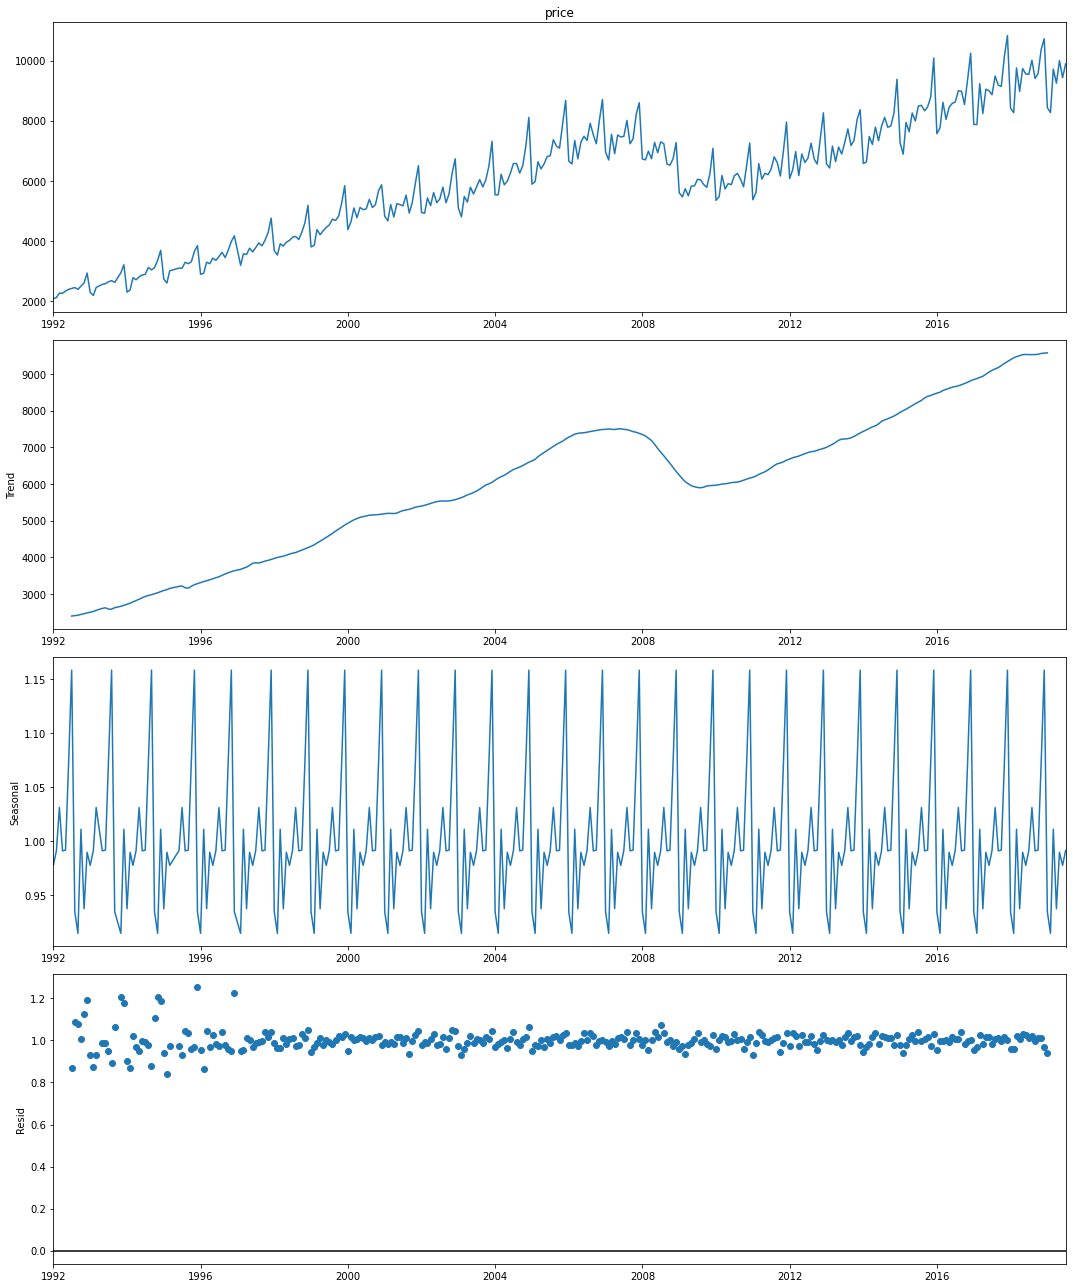

In [38]:
descomposed_df.plot();

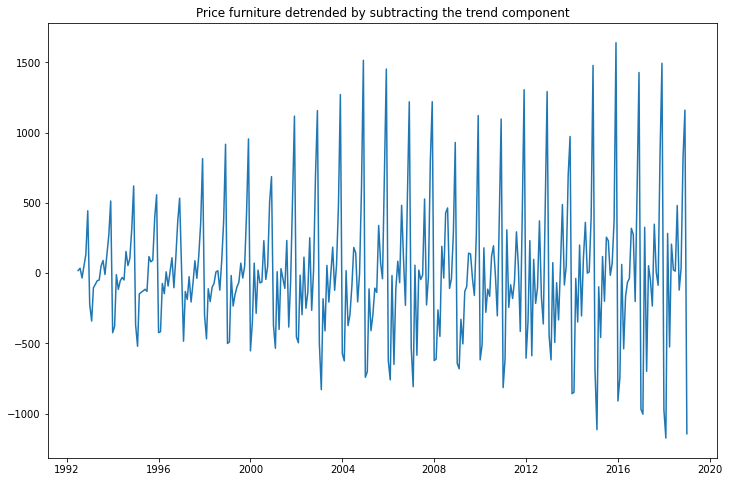

In [39]:
# Using statmodels: Subtracting the Trend Component.
from statsmodels.tsa.seasonal import seasonal_decompose

result_add = seasonal_decompose(df['price'], model='additive', period=12)
detrended = df.price.values - result_add.trend
plt.subplots(figsize=(12,8))
plt.plot(detrended)
plt.title('Price furniture detrended by subtracting the trend component', fontsize=12);

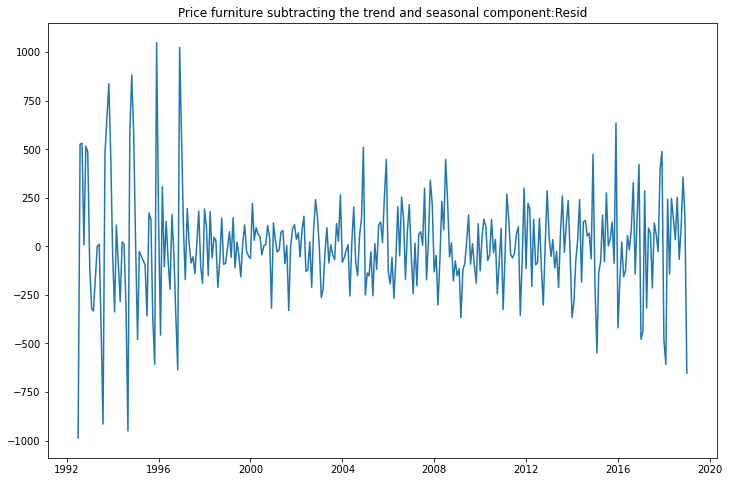

In [40]:
deseasonalize= detrended.values - result_add.seasonal
plt.subplots(figsize=(12,8))
plt.plot(deseasonalize)
plt.title('Price furniture subtracting the trend and seasonal component:Resid', fontsize=12);

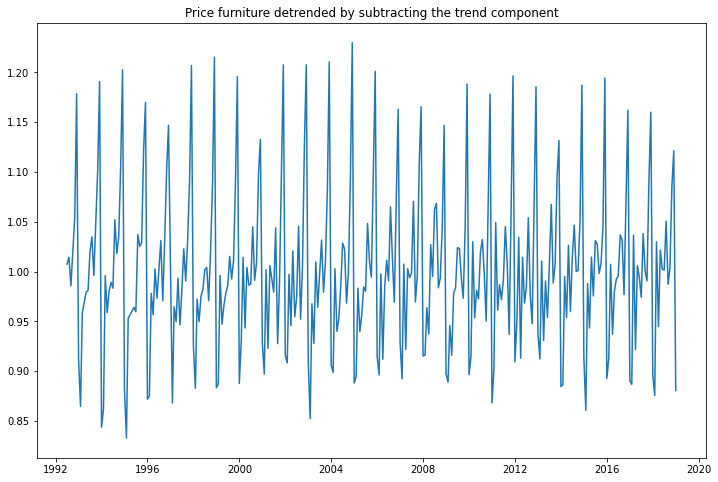

In [41]:

result_mul = seasonal_decompose(df['price'], model='multplicative', period=12)
detrended = df.price.values / result_mul.trend
plt.subplots(figsize=(12,8))
plt.plot(detrended)
plt.title('Price furniture detrended by subtracting the trend component', fontsize=12);

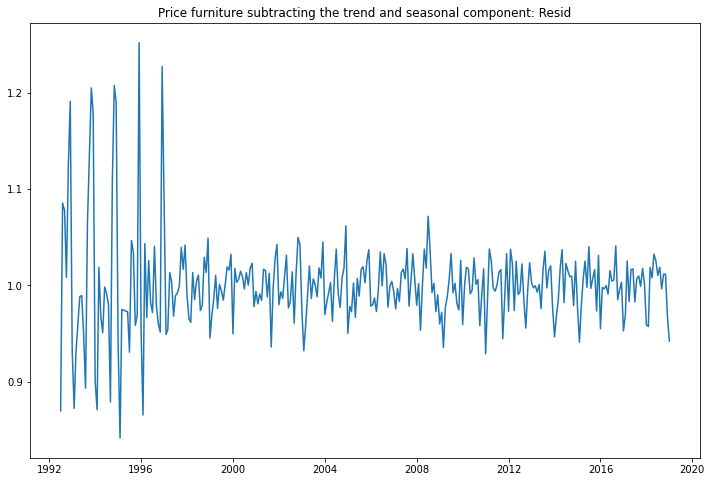

In [42]:
deseasonalize= detrended.values / result_mul.seasonal
plt.subplots(figsize=(12,8))
plt.plot(deseasonalize)
plt.title('Price furniture subtracting the trend and seasonal component: Resid', fontsize=12);

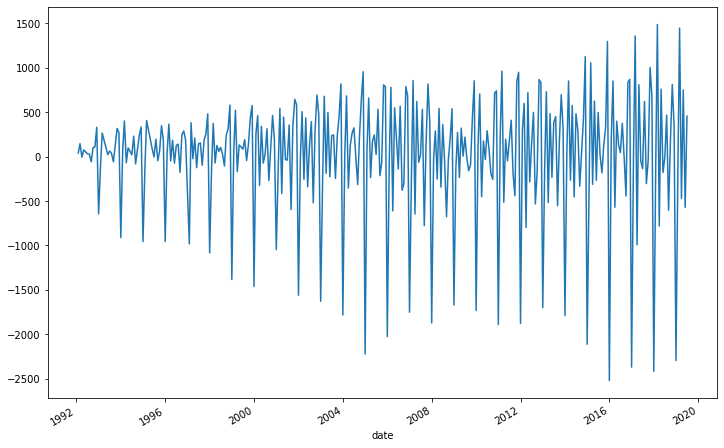

In [43]:
#Teacher solution
diferencio = df['price'].diff(1).dropna()

diferencio.plot(figsize=(12,8));

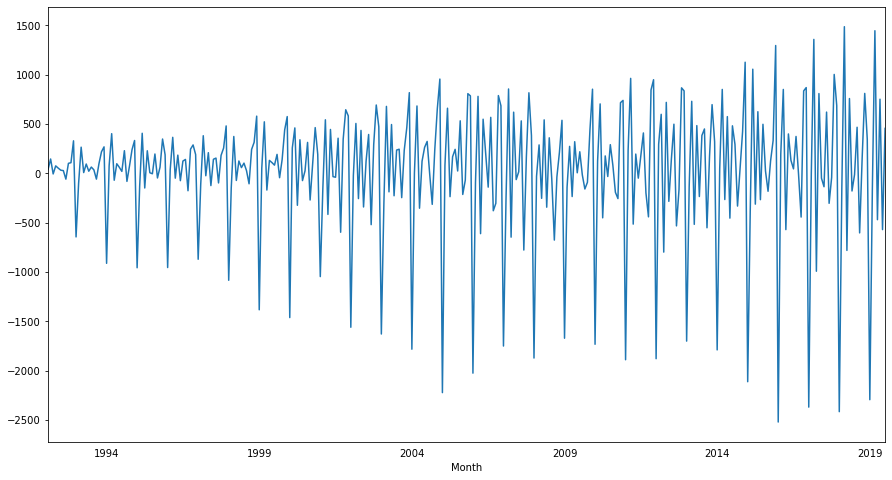